# Agrupamiento y visualización de información textual

Autor: Eric S. Tellez <eric.tellez@infotec.mx> <br/>


## Introducción

Hasta el momento hemos visto operaciones de búsqueda de texto completo y de la búsqueda en espacios métricos.
Ambas operaciones son fundamentales en un sistema de recuperación de información, y de hecho, en otras áreas como son la inteligencia computacional.
También se vió la clasificación basada en vecinos cercanos como una herramienta para comparar modelos de texto.

Recordemos que el objetivo de la disciplina de Recuperación de Información es facilitar el acceso a las personas a grandes cúmulos de información,
de tal forma que seamos capaces de encontrar la información sobre la que se realizan consultas. En ese espíritu, el agrupamiento (clustering) y la visualización son de gran ayuda para obtener información de valor.

En el agrupamiento se parte una base de datos métrica (documentos o cualquier otro tipo de dato) de tal forma que los elementos en cada una de sus partes tengan cierta afinidad, por ejemplo que sean cercanos y compactos, o que pertenezcan a un grupo donde la densidad sea alta. Normalmente se intenta reducir una función de costo para cada grupo y de manera global.

Dado que los documentos suelen estar representados en muy alta dimensión, es prácticamente imposible visualizar y aprender sobre la estructura de una base de datos. Esto último lo podemos realizar mediante transformaciones que nos permitan obtener dimensiones que permitan la visualización de las estructuras subyacientes, i.e., dimensiones 2 y 3.

Recuerde que en la representación basada en bolsas de palabras es común encontrar vectores de decenas o cientos de miles de dimensiones, aunque sumamente dispersos. En las representaciones semánticas se encuentran en espacios densos de cientos de dimensiones. La distancia en ambos casos es comúnmente medida en términos de los ángulos de los vectores, ya que esto nos permité disociar las magnitudes que cambiarán con la cantidad de componentes y con el tamaño de los documentos. Lo último nos da ventajas ya que normalmente se desea recuperar documentos largos a partir de consultas pequeñas.

## Agrupamiento (clustering)

Existen diversos algoritmos de clustering que pueden apoyar en la tarea, todos ellos con diferentes características que lo hacen adecuado para ciertas tareas.
En particular, podemos mencionar algunos ejemplos paradigmáticos, como sigue:

- [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering): Intenta encontrar los $k$ centros $C$ que minimicen la suma de las distancias al cuadrado de todos los elementos de la base de datos a algún elemento en $C$. En su forma más simple, el algoritmo comienza con una muestra aleatoria de $k$ puntos y usa el [algoritmo de Lloyd](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm) para refinar los $k$ puntos: en cada iteración, se genera una partición con los elementos más cercanos a cada uno de los centroides, y se usan para generar nuevos centroides. El algoritmo convergerá en algunas iteraciones ya que es bastante rápido. Tiene como desventaja que el usuario debe saber el número de grupos $k$ óptimo y que su calidad puede variar de manera dramática con diferentes formas de inicializar el algoritmo.

- [affinity propagation](https://en.wikipedia.org/wiki/Affinity_propagation): Usa tres matrices y un esquema basado en mensajes para obtener los elementos más adecuados para representar una base de datos. En este algoritmo no es necesario especificar $k$ ya que se calcula como parte del proceso. Las tres matrices son, la matriz de similitud, la matriz de reponsabilidad y de de disponibilidad. La idea es considerar a todos los elementos como posibles centros e intercambiar mensajes entre las matrices de responsabilidad y disponibilidad, usando la matriz de similitud como base de la información. El algoritmo es iterativo y se detendrá cuando no haya cambios en las matrices o se llegue a un límite en el número de las iteraciones. La estructura del cluster emergerá como parte este proceso.

- [DBSCAN](https://es.wikipedia.org/wiki/DBSCAN): Es un algoritmo que es especial para descubrir grupos en base a la densidad, de tal forma que para que dos puntos $u$ y $v$ pertenezcan al mismo grupo, no necesariamente son cercanos entre ellos, pero si que hay una serie de puntos $\{w_i\}$ en el mismo grupo con los que se puede trazar una ruta entre $u$ y $v$. Ahora, para que un elemento forme parte de un grupo debe cumplir que comparte al menos $\ell$ elementos en común con el grupo en un radio de búsqueda $\epsilon$, los puntos dentro de una ruta entonces cumplen con estas propiedades. A diferencia de los algoritmos basados en particiones compactas, las formas de los grupos en DBSCAN pueden ser caprichosas. No es necesario conocer el número de centros pero si $\ell$ y $\epsilon$.

## Proyecciones a baja dimensión
Una de las herramientas más importantes para el entendimiento de una colección de objetos, llamese documento o cualquier otro tipo de dato, es la visualización. La visualización consiste en obtener proyecciones en 2D o 3D y utilizar diferentes estrategias para que la información de valor sea _evidente_ a nuestros ojos.

En particular, podemos considerar dos formas primordiales de proyecciones: lineales y no-lineales. Las proyecciones lineales son eficientes de calcular pero solo podrán capturar información lineal en la proyección. Un ejemplo paradigmático es Principal Compontent Analysis ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)), que es ampliamente usado en ciencia de datos y que la gran mayoría de la paquetería para análisis de datos lo implementará ([PCA en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [PCA en Julia](https://github.com/JuliaStats/MultivariateStats.jl)). En particular, cuando los datos podrían no ser proyectados de manera adecuada con transformaciones lineales, entonces se hace necesario el uso de transformaciones no lineales. En este caso podemos tener en cuenta Kernel PCA ([KPCA](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)) cuya no linearidad es manejada por funciones kernel, i.e., realizando una proyección no-linear mediante el kernel antes de aplicar PCA.

La familia de métodos _manifold learning_ también pueden ser una opción. En estos casos, en lugar de analizar las componentes de los vectores, se hace uso de la matriz de afinidad $A$, i.e., matriz de distancias $d(u, v) \forall u, v \in X$, o el grafo de todos los $k$ vecinos cercanos $G$. En particular, estos métodos intentarán crear representaciones vectoriales de baja dimensión que repreduzcan hasta cierto nivel de precisión dicha matriz $A$ o $G$, esto es, que las relaciones topológicas se preserven. Entre estos métodos podemos encontrar [Isomap](https://en.wikipedia.org/wiki/Isomap), [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) o [UMAP](https://umap-learn.readthedocs.io/en/latest/).

En particular, es posible encontrar implementaciones de ellos en [sklearn](https://scikit-learn.org/stable/modules/manifold.html) y [UMAP](https://umap-learn.readthedocs.io/en/latest/) para Python; en Julia [ManifoldLearning.jl](https://github.com/wildart/ManifoldLearning.jl) y [SimSearchManifoldLearning.jl](https://github.com/sadit/SimSearchManifoldLearning.jl), donde también se puede acceder a una implementación eficiente de UMAP.


# Ejemplo


In [1]:
using Pkg
Pkg.activate(".")

using SimilaritySearch, SimSearchManifoldLearning, TextSearch, StatsBase, Clustering, Plots, LinearAlgebra, HypertextLiteral

  Activating project at `~/IR-2022/Unidades`


In [2]:
function create_index(vectors)
    dist = NormalizedCosineDistance()
    db = VectorDatabase(vectors)
    index = SearchGraph(; dist, db, verbose=false)
    index!(index)
    optimize!(index, MinRecall(0.9))
    index
end

function text_model_and_vectors(corpus;
        textconfig=TextConfig(group_usr=false, group_url=true, del_diac=true, lc=true, group_num=true, nlist=[1], qlist=[]),
        model=VectorModel(IdfWeighting(), TfWeighting(), textconfig, corpus)
    )
    vectors = vectorize_corpus(model, textconfig, corpus)
    (; textconfig, model, vectors)
end


text_model_and_vectors (generic function with 1 method)

In [3]:
include("read_datasets.jl")
D, _ = read_news()
T = text_model_and_vectors(D.corpus);

In [4]:
@time index = create_index(T.vectors);

 17.166880 seconds (12.93 M allocations: 1.683 GiB, 6.45% gc time, 38.98% compilation time)


In [5]:
function create_umap_embeddings(index; k=15, n_epochs=100, neg_sample_rate=3, tol=1e-3, layout=RandomLayout())
    #layout = RandomLayout()
    # increase both `n_epochs` and `neg_sample_rate` to improve projection
    #layout = SpectralLayout() ## the results are much better with Spectral layout
    U2 = fit(UMAP, index; k, neg_sample_rate, layout, n_epochs, tol)  # spectral layout is too slow for the input-data
    U3 = fit(U2, 3; neg_sample_rate, n_epochs, tol)  # reuses U2
    (e2=U2.embedding, e3=U3.embedding)
end

function normcolors(V)
    min_, max_ = extrema(V)
    V .= (V .- min_) ./ (max_ - min_)
    V .= clamp.(V, 0, 1)
end

function plot_umap(e2, e3)
    normcolors(@view e3[1, :])
    normcolors(@view e3[2, :])
    normcolors(@view e3[3, :])

    C = [RGB(c...) for c in eachcol(e3)]
    X = @view e2[1, :]
    Y = @view e2[2, :]
    P = scatter(X, Y, c=C, fmt=:png, size=(600, 600), ma=0.3, a=0.3, ms=1, msw=0, label="")
    display(plot!(title="colors are related to spatial proximity in the 3d projection")) 
end

plot_umap (generic function with 1 method)

In [18]:
@info Threads.nthreads()
@time e2, e3 = create_umap_embeddings(index, k=15, tol=1e-3, layout=RandomLayout());

 11.049404 seconds (69 allocations: 3.463 MiB)
 17.343349 seconds (942 allocations: 46.855 MiB, 1.12% gc time)


┌ Info: 64
└ @ Main In[18]:1
*** computing graph
*** layout embedding RandomLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 0.062208241
- embedding init: 0.000331608
- embedding opt: 2.940886773



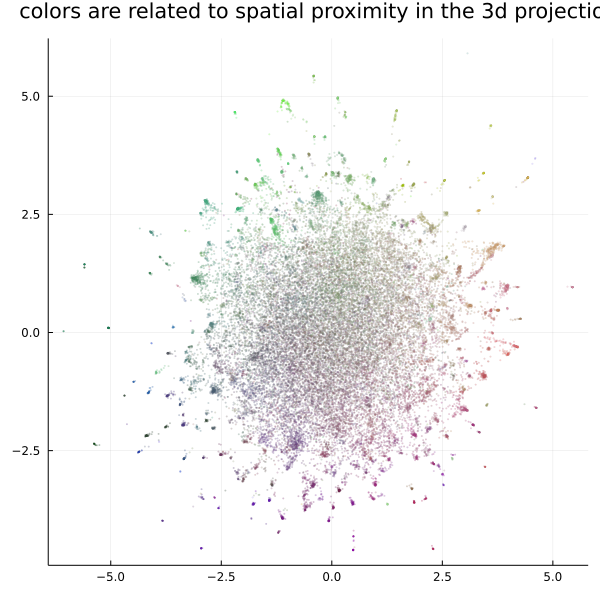

In [19]:
plot_umap(e2, e3)

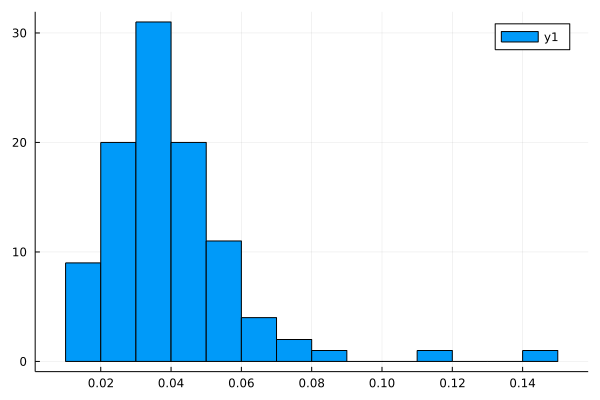

In [76]:
function compute_epsilon(emb; m=100, k=7)
    db = MatrixDatabase(emb)
    E = ExhaustiveSearch(; dist=L2Distance(), db)
    queries = rand(db, m)
    I, D = searchbatch(E, queries, k)
    histogram(last.(eachcol(D)))
end

compute_epsilon(e2)

# Clustering

In [77]:
clusters_ = dbscan(e2, 0.02, min_cluster_size=20)

106-element Vector{DbscanCluster}:
 DbscanCluster(52, [4, 675, 1995, 2299, 2461, 2662, 2968, 3584, 4418, 5507  …  22350, 22859, 23474, 24482, 25346, 26299, 27244, 27801, 30127, 30237], Int64[])
 DbscanCluster(115, [11, 319, 399, 542, 788, 1603, 1626, 1822, 2214, 2366  …  27755, 27844, 27954, 28767, 29105, 29408, 29460, 29628, 29890, 30171], Int64[])
 DbscanCluster(26, [26, 117, 2198, 3063, 3174, 4244, 4811, 5122, 5605, 7039  …  22222, 23175, 24670, 25700, 25940, 25955, 26390, 27645, 28358, 30015], Int64[])
 DbscanCluster(30, [32, 809, 3315, 3692, 3787, 5867, 7258, 7539, 8770, 9691  …  23395, 23771, 24417, 24524, 25291, 25556, 25771, 25946, 27412, 30194], Int64[])
 DbscanCluster(57, [35, 90, 393, 1142, 1423, 1994, 2896, 2999, 3184, 3618  …  25594, 26008, 26188, 27173, 27305, 27541, 27677, 27914, 29281, 29774], Int64[])
 DbscanCluster(47, [39, 482, 1003, 1139, 1888, 2196, 2507, 3104, 3155, 4236  …  24721, 25308, 25826, 27211, 27687, 27966, 28211, 29333, 29558, 29840], Int64[])
 DbscanClu

In [78]:
plot()

let res=KnnResult(20), voc=T.model.voc, bow=Dict{UInt32,Float32}()
    for c in clusters_
        X = @view e2[1, c.core_indices]
        Y = @view e2[2, c.core_indices]
        scatter!(X, Y, c=:auto, fmt=:png, size=(600, 600), ma=0.3, a=0.3, ms=1, msw=0, label="")
        if rand() < 0.3
            L = sort!(collect(countmap(D.labels[c.core_indices])), by=last, rev=true)
            L = [ "$k ($v); " for (k, v) in L]
            
            
            empty!(bow)
            S = []
            for i in c.core_indices
                V = T.vectors[i]
                length(V) == 1 && continue  # empty vectors 
                TextSearch.add!(bow, V)
                if length(S) < 7
                    push!(S, @htl """<li>$(D.corpus[i])</li>""")
                end
            end
            
            res = reuse!(res)
            for (tokenID, weight) in bow
                push!(res, tokenID, -weight)
            end
            
            LV = []
            for (id, weight) in res
                push!(LV, string(voc.token[id], " (", -round(weight; digits=2), "); "))
            end
            
            display(@htl """
            <div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
                CLUSTER LABELS ($(length(c.core_indices))): <span style="background-color: rgb(60, 60, 10);">$(L)</span>
            <div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
                VOC: $(LV)
                <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
                <ul> $S </ul>
                </div>
            </div>
            </div>
            """)
            
            # @show C[c.core_indices, :]  # cut text
        end
    end
end


<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (26): <span style="background-color: rgb(60, 60, 10);">PublimetroMX (5); bbcmundo (3); RicardoAlemanMx (3); Radio_Formula (3); NTN24 (2); El_Universal_Mx (2); azucenau (2); AristeguiOnline (2); TelemundoNews (2); SinEmbargoMX (1); UniNoticias (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: escobar (7.01); debanhi (6.41); mario (1.98); padre (1.8); joven (1.09); hija (1.06); muerta (1.02); caso (1.0); necropsia (0.94); leon (0.94); cisterna (0.9); autopsia (0.83); abusada (0.71); cuerpo (0.7); que (0.69); con (0.67); nuevo (0.66); asesinada (0.66); mexico (0.58); sexualmente (0.58); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Cae presión sobre Samuel | La desaparición de la joven Debanhi Escobar y otras mujeres en NL durante las últimas dos semanas, así como las violencias que enfrentan las ciudadanas de la entidad, intensificaron los reclamos contra el Gobernador y su esposa
https://t.co/wwDy5YfZ1o https://t.co/dDp7jKp31w</li><li>RT @ContrapesoC: El señor Mario Escobar señaló que espera que se encuentre la verdad sobre el asesinato de su hija.
https://t.co/GSUYVEFYGX</li><li>RT @Univ_espect: Claudia Álvarez, Rebecca Jones y otras famosas se indignan por el caso de Debanhi Escobar
https://t.co/0A3lYUlNUT https://…</li><li>El padre de Debanhi Escobar dijo que era falso que ella hubiera muerto por un golpe en la cabeza.

https://t.co/kMsLd1j58O</li><li>Debanhi Escobar: 3 interrogantes sobre el caso de la joven que apareció muerta en una cisterna en México tras dos semanas desaparecida https://t.co/toFrag2F3m</li><li>Velan los restos de Debanhi Escobar, la joven de 18 años que desapareció en Nuevo León, México, en medio de teorías que sugieren que fue abusada sexualmente antes de morir.

Este es el resumen de lo que ha sucedido hasta el momento 👇🏻 https://t.co/WSXil3ABsq</li><li>“Mi hija Debanhi fue asesinada, maltratada, ultrajada y sembrada”: Mario Escobar.
https://t.co/HUybXHqLFZ https://t.co/IDBn9GqDwh</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (57): <span style="background-color: rgb(60, 60, 10);">abc_es (57); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: opinion (16.38); ✍ (15.88); @zrilor (3.55); @pedrocuartango (2.76); alvaro (2.63); martinez (2.36); @iruizquintano (1.84); @rosabelmonte (1.75); _hu (1.44); @hughes (1.44); @herreraencope (1.18); albiac (1.16); ventoso (1.14); @girautaoficial (1.11); @abeinfanzon (1.1); luis (1.08); @isanseba (1.06); &apos;, (1.04); herrero (0.98); marin (0.95); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Morante y la Ponferradina https://t.co/U4WoRfmelY ✍ La opinión de @AbeInfanzon</li><li>Pluriabsurdo https://t.co/S9SoJy4AkO ✍ La opinión de Manuel Marín</li><li>Alerta antisanchista https://t.co/A80cyCeM5V ✍ La opinión de @GirautaOficial</li><li>De Astérix a los Reyes Católicos https://t.co/9dTllp6ghu ✍ La opinión de @ExpositoCOPE</li><li>Djokovic, la verdad ni al médico https://t.co/51NTDYwYfH ✍ La opinión de @Traban</li><li>Volver a sacar a Dios a cuestas https://t.co/OZaj6bWvAt ✍ &apos;El Burladero&apos;, la opinión de @herreraencope</li><li>Comederos socialistas https://t.co/JSGFMGjq5Z ✍ La opinión de @GirautaOficial</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (21): <span style="background-color: rgb(60, 60, 10);">AristeguiOnline (6); epigmenioibarra (5); SinEmbargoMX (4); Radio_Formula (3); Milenio (3); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: lp (6.05); gas (4.89); precios (2.04); precio (1.73); lista (1.59); cre (1.56); suscribo (1.11); aplicables (0.98); maximos (0.97); al (0.95); del (0.94); mexico (0.93); completa (0.92); !! (0.87); conoce (0.85); pipa (0.78); pachuca (0.72); maximo (0.71); @biolbrig (0.7); @marthanavagmez0 (0.7); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Precio del gas LP: Conoce los costos del combustible en México para la semana del 26 de junio al 2 de julio.     https://t.co/r5xdkVf1Hc</li><li>El precio del gas LP ha aumentado en un año casi 30 %, lo que ha resultado en un mayor gasto para los consumidores y en ganancias para las empresas, en especial para las nueve que controlan el mercado en México, de acuerdo con datos de la CRE y la Profeco https://t.co/oa0OeXyGo5 https://t.co/zmevRdKlyn</li><li>El juez Gómez Fierro le da la razón al gobierno y se niega a quitar el tope a precios del gas LP
https://t.co/PrukQn9rsP https://t.co/BBE5hgN8yY</li><li>RT @DrIlIlIlIilIll1: Ni perdón ni olvido...!!!
#OposicionMiserableYMezquina 

HDSPM...!!! https://t.co/uELiWesVGn</li><li>CRE publica LISTA de los precios que tendrá el gas LP del 12 al 18 de diciembre https://t.co/3FQISlIOpb https://t.co/5EUBtmZsYW</li><li>Conoce los precios del gas LP aplicables del 12 al 18 de diciembre | Lista completa https://t.co/GdIhxLFgI2 https://t.co/Yp2CB1Br7P</li><li>Conoce el precio máximo del gas LP del 26 de junio al 2 de julio | Lista completa
https://t.co/neTlCi6byh https://t.co/qNNIAdpJUI</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (52): <span style="background-color: rgb(60, 60, 10);">El_Universal_Mx (43); azucenau (4); RicardoAlemanMx (1); LaRazon_mx (1); Radio_Formula (1); AristeguiOnline (1); Milenio (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: potosi (11.06); san (9.94); luis (9.39); _slp (8.6); @eluniversal (8.6); rt (2.67); ... (2.41); #enterate (2.13); : (1.8); ➡ (1.46); ; (1.35); 🚨 (0.97); ✨ (0.91); un (0.9); 0 (0.9); gobernador (0.86); 📍 (0.84); reportan (0.83); ayuntamientos (0.82); 🚩 (0.81); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @ElUniversal_SLP: #PorSiNoLoViste ✨ Real de Catorce es el destino más visitado de San Luis Potosí; cada fin de semana más de 8 mil turis…</li><li>RT @ElUniversal_SLP: #ReporteCovid 🚨 Fallecen en San Luis Potosí cuatro adultos de más de 40 años por Covid; reportan la cifra más baja de…</li><li>RT @ElUniversal_SLP: #Entérate 📍 Al asegurar que &quot;la seguridad es una prioridad” en San Luis, el gobernador llamó a los ayuntamientos a asu…</li><li>RT @ElUniversal_SLP: 🤝 Comercios del Centro Histórico de San Luis Potosí colocaron carteles con toda la información sobre todos los esquema…</li><li>RT @ElUniversal_SLP: #Entérate | 💉 A partir del 3 de noviembre inicia la vacunación contra la Influenza en San Luis Potosí 

https://t.co/6…</li><li>RT @ElUniversal_SLP: ➡️ El secretario de Educación de San Luis Potosí, Ernesto Barajas indicó que hasta el momento el 95% de alumnos de niv…</li><li>RT @ElUniversal_SLP: #UniversoDeLetras 📚📖La escritora mexicana, Ana Medina, presenta “Furor amoris” en exclusiva para EL UNIVERSAL San Luis…</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (22): <span style="background-color: rgb(60, 60, 10);">el_pais (4); Reforma (3); CNNEE (3); Radio_Formula (3); El_Universal_Mx (3); bbcmundo (2); PublimetroCol (1); PublimetroChile (1); AdriDelgadoRuiz (1); AristeguiOnline (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: puedes (0.88); te (0.74); #premiosplatino0 (0.6); . (0.57); propio (0.57); discord (0.56); consultar (0.56); consejos (0.55); si (0.55); como (0.55); no (0.55); celebran (0.53); &quot;.. (0.52); sus (0.52); amor (0.5); bimestres (0.5); personas (0.48); _ dice (0.48); region (0.48); funcionan (0.48); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>WhatsApp Web: ¿Cómo recibir notificaciones cuando alguien se conecte?.  https://t.co/GlozctFnhI</li><li>Spotify y Discord no funcionan para miles de usuarios https://t.co/xVnvfN65uu https://t.co/vLqsRzNIeG</li><li>El  poderoso mensaje que @ZelmaCh dio sobre el amor propio en &quot;Quiero cantar&quot;

https://t.co/5tUd7BwcSF https://t.co/2L0QWDuREv</li><li>Un ajolote de este museo fue la inspiración para diseñar uno de los billetes más bonito del mundo. Conoce el santuario “Axolotitlán” y su importante labor de preservación.

https://t.co/DewM4LrBHB</li><li>El productor ha señalado que esta historia se da por medio de los animales que Frida tenía, donde también se abordan valores como el amor propio, la amistad y la familia 

https://t.co/riLfWXI7jx https://t.co/49sIlqmpnI</li><li>Estas son las historias de cinco mujeres en la primera línea de la guerra en Ucrania https://t.co/kooLKPdnDX</li><li>#LoMásVisto | ¿Polarización en México? @lopezobrador_ dice que no existe, que son los conservadores.
https://t.co/deIDceCksa https://t.co/EU8DJr9Bu5</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (35): <span style="background-color: rgb(60, 60, 10);">epigmenioibarra (34); CNNEE (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: saldo (5.94); policias (4.78); muertos (4.46); abrieron (4.37); federales (4.05); estatales (3.96); fuego (3.96); #juicioaexpresidentes (3.71); heridos (3.56); 0 (3.41); escarmentar (3.39); nochixtlan (3.33); educativa (3.26); militares (3.16); manifestantes (2.83); opositores (2.74); cientos (2.61); orden (2.59); oaxaca (2.46); con (2.39); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>1 Abel
2 Abelardo
3 Adán
4 Alexander
Tomaron 5 autobuses para trasladarse a la CdMx. Era una práctica habitual, pero tuvo una respuesta inmediata e insólita: policías municipales, estatales y federales abrieron fuego contra los normalistas. También hubo militares.
#NoAlOlvido https://t.co/wrZZmVUa1Z</li><li>1 Abel
2 Abelardo
3 Adán
4 Alexander
Tomaron 5 autobuses para trasladarse a la CdMx. Era una práctica habitual, pero tuvo una respuesta inmediata e insólita: policías municipales, estatales y federales abrieron fuego contra los normalistas. También hubo militares.
#NoAlOlvido https://t.co/mIZk2GO8VY</li><li>Nochixtlán
2016 
Con la orden de &quot;escarmentar&quot; a los opositores a la Reforma Educativa, cientos de policías estatales y federales abrieron fuego contra los manifestantes de Oaxaca, con un saldo de 8 muertos y más de 100 heridos.
#JuicioAExPresidentes https://t.co/jaGInnBE05</li><li>Nochixtlán
2016 
Con la orden de &quot;escarmentar&quot; a los opositores a la Reforma Educativa, cientos de policías estatales y federales abrieron fuego contra los manifestantes de Oaxaca, con un saldo de 8 muertos y más de 100 heridos.
#JuicioAExPresidentes https://t.co/Rj50DUcIhc</li><li>El Bosque
1998
Con la excusa de &quot;pacificar&quot;, más de mil militares y policías lanzaron un ataque sobre varias comunidades de este municipio chiapaneco, con un saldo de 8 muertos y 53 detenidos, casas saqueadas y propiedades destruidas.
#JuicioAExPresidentes https://t.co/O20SbYrEOx</li><li>El Charco
1998 
En la escuela de esta comunidad de Guerrero se realizó una asamblea indígena. En la madrugada, militares rodearon el sitio e iniciaron un tiroteo que duró seis horas. El saldo fue de 11 muertos, cinco heridos y 25 detenidos.
#JuicioAExPresidentes https://t.co/o5ZFijKdMK</li><li>Nochixtlán
2016 
Con la orden de &quot;escarmentar&quot; a los opositores a la Reforma Educativa, cientos de policías estatales y federales abrieron fuego contra los manifestantes de Oaxaca, con un saldo de 8 muertos y más de 100 heridos.
#JuicioAExPresidentes https://t.co/gd4kTyw4Xu</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (20): <span style="background-color: rgb(60, 60, 10);">Radio_Formula (4); Milenio (4); SinEmbargoMX (3); PublimetroMX (3); El_Universal_Mx (2); Reforma (1); azucenau (1); LaRazon_mx (1); julioastillero (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: azul (5.44); cruz (5.17); 🚂 (1.46); fractura (0.86); concachampions (0.86); baja (0.82); @publisport (0.75); corona (0.72); rt (0.67); 👋 (0.66); _mx (0.66); jesus (0.63); : (0.58); planta (0.58); antuna (0.57); leon (0.52); titulo (0.51); &apos; (0.5); final (0.5); hidalgo (0.47); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @UnivDeportes: SALEN POR LA PUERTA TRASERA 🚪

Las figuras de Cruz Azul han salido de forma polémica ⚽🚂👋

https://t.co/64X1Zkz5KS</li><li>Jesús Corona se fractura y es baja dos meses para Cruz Azul https://t.co/vWEWaRkOu5 https://t.co/ZiynqyYEQk</li><li>▶ &quot;Ellos usurparon las funciones que deben ser nuestras&quot;

Dos directivas de la Cooperativa Cruz Azul mantienen una disputa que ha orillado a jubilados de Hidalgo a quedarse sin los recursos a los que tienen derecho

📺 La entrevista con @AlexDominguezB https://t.co/hwsjid1Ev7</li><li>FOTO: Aficionados del Cruz Azul protagonizan de nuevo riña en partido contra Tigres
https://t.co/myoYOuLjjT https://t.co/fbpGpEHRB3</li><li>RT @Publisport_MX: El Piojo Alvarado reveló cómo se dio su salida de Cruz Azul

https://t.co/VBA7K5j6up</li><li>Sorteo Concachampions 2022: Pumas, Santos, León y Cruz Azul conocen a sus rivales.

https://t.co/1ojsv3EZ3S https://t.co/Ube4VF1hBf</li><li>RT @Publisport_MX: Juan Reynoso dejará de ser director técnico de Cruz Azul 🚂❌

https://t.co/64jTahapmk</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (31): <span style="background-color: rgb(60, 60, 10);">epigmenioibarra (29); el_pais (1); PublimetroChile (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: cocula (4.87); basurero (4.68); giei (4.67); juan (4.34); cenizas (3.7); normalistas (3.63); 0 (3.32); #noalolvido (3.18); guerreros (3.12); rio (3.03); incinerados (2.8); israelj (2.8); israelc (2.8); esparcidas (2.78); conformacion (2.75); anibal (2.57); cremacion (2.57); jorgealvarez (2.57); incineracion (2.57); evidencias (2.57); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>17 Felipe
18 Juan
19 IsraelC
20 IsraelJ
Previo a la conformación del GIEI, el gobierno lanzó su &quot;verdad histórica&quot;: los normalistas fueron asesinados por el cártel Guerreros Unidos, incinerados en el basurero de Cocula y sus cenizas esparcidas en el río San Juan.
#NoAlOlvido https://t.co/DgBm6CPqTA</li><li>21 Jesús
22 Jonás
23 JorgeAlvarez
24 Jorge Aníbal
El GIEI consideró técnicamente imposible la incineración de los 43 normalistas en el basurero de Cocula, por no haber evidencias de una cremación colectiva al aire libre, dada la cantidad de combustibles necesaria para ello. https://t.co/9zEn6OdojE</li><li>25 JorgeAntonio
26 JorgeLuisG
27 JoséManuelC
28 JoséÁngelN
El GIEI mostró evidencia gráfica de que Tomás Zerón, director de la Agencia de Investigación Criminal de la PGR, estuvo en el río San Juan un día antes del &quot;hallazgo&quot; de bolsas con cenizas y restos óseos. 
#NoAlOlvido https://t.co/IAB9IszHWt</li><li>21 Jesús
22 Jonás
23 JorgeAlvarez
24 Jorge Aníbal
El GIEI consideró técnicamente imposible la incineración de los 43 normalistas en el basurero de Cocula, por no haber evidencias de una cremación colectiva al aire libre, dada la cantidad de combustibles necesaria para ello. https://t.co/wprgfBPlIF</li><li>17 Felipe
18 Juan
19 IsraelC
20 IsraelJ
Previo a la conformación del GIEI, el gobierno lanzó su &quot;verdad histórica&quot;: los normalistas fueron asesinados por el cártel Guerreros Unidos, incinerados en el basurero de Cocula y sus cenizas esparcidas en el río San Juan.
#NoAlOlvido https://t.co/hIThdLiEP0</li><li>21 Jesús
22 Jonás
23 JorgeAlvarez
24 Jorge Aníbal
El GIEI consideró técnicamente imposible la incineración de los 43 normalistas en el basurero de Cocula, por no haber evidencias de una cremación colectiva al aire libre, dada la cantidad de combustibles necesaria para ello. https://t.co/tJncokNbL7</li><li>25 JorgeAntonio
26 JorgeLuisG
27 JoséManuelC
28 JoséÁngelN
El GIEI mostró evidencia gráfica de que Tomás Zerón, director de la Agencia de Investigación Criminal de la PGR, estuvo en el río San Juan un día antes del &quot;hallazgo&quot; de bolsas con cenizas y restos óseos. 
#NoAlOlvido https://t.co/RSBFx9p6MC</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (48): <span style="background-color: rgb(60, 60, 10);">EFEnoticias (10); Milenio (8); SinEmbargoMX (6); LaRazon_mx (6); Radio_Formula (5); El_Universal_Mx (2); PublimetroCol (2); CNNEE (2); AristeguiOnline (2); NTN24 (1); bbcmundo (1); el_pais (1); RicardoAlemanMx (1); abc_es (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: mil (6.11); casos (6.02); muertes (5.44); nuevos (5.38); covid0 (5.22); 0 (5.21); contagios (4.26); registra (4.22); horas (4.14); mexico (3.97); suma (2.26); #ultimahora (2.12); reporta (2.04); 🚨 (2.03); coronavirus (1.73); mas (1.6); por (1.38); supera (1.32); | (1.29); ultimas (1.28); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>El corresponsal @BowenBBC estuvo en otras guerras de Rusia. Ahora reporta desde Kiev
https://t.co/plE3uYGGKk</li><li>Covid-19 México: Suman 233 mil 248 muertes y más de 2 millones de personas se han recuperado | Gráficas
https://t.co/YbSFwrHSEo https://t.co/fyCdaYSbEi</li><li>México vuelve a registrar más de 20 mil nuevos casos de covid-19 en 24 horas
https://t.co/zbTbk7Wgww https://t.co/rcGrGTIUet</li><li>🚨 #ÚLTIMAHORA | COVID anda ‘bravo’: suman 16,214 nuevos casos y 23 fallecidos adicionales.
https://t.co/yn5OBTCwMk https://t.co/x22XbGLXJQ</li><li>Actualmente, México registra casos de la subvariante BA.2 de Ómicron en 12 entidades del país.

https://t.co/POPg6tzMNs</li><li>Salud reporta 242 muertes y 3 mil 353 nuevos casos de la COVID-19 en México
https://t.co/C6y4n090zU https://t.co/gkNxZYrIYT</li><li>México suma 245 muertes y 2 mil 956 nuevos casos de coronavirus en 24 horas

Ahora más que nunca es momento de mantener arriba la guardia

https://t.co/X6WypfbGEq https://t.co/CRz4zS07zL</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (31): <span style="background-color: rgb(60, 60, 10);">PublimetroChile (5); PublimetroCol (5); Reforma (4); Radio_Formula (4); NTN24 (2); LaRazon_mx (2); RicardoAlemanMx (2); PublimetroMX (1); El_Universal_Mx (1); Milenio (1); bbcmundo (1); CNNEE (1); teleSURtv (1); el_pais (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: sociales (5.57); redes (5.44); 👇 (1.0); las (0.98); @reformagadgets (0.88); registro (0.83); sus (0.78); se (0.7); viralizo (0.66); fue (0.64); corazon (0.61); #lunesderesenas (0.6); cantante (0.6); gano (0.58); mensaje (0.57); reacciones (0.55); tomiii (0.53); yanfry (0.53); enternecio (0.53); enveneno (0.52); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>El registro se viralizó en redes sociales. 👇
https://t.co/mOLa9Yr6Pn</li><li>Monreal reclama a redes sociales; acusa freno de iniciativa
https://t.co/6tRXBOQ0mw</li><li>📷 #FOTOS: @LuisitoComunica aparece en portada de #Playboy fumando marihuana y causa furor en redes sociales https://t.co/piB53ioRXN https://t.co/4RB8oi1TT0</li><li>Así funciona el desfibrilador que le implementaron a Christian Eriksen en el corazón, tras desplomarse en pleno juego https://t.co/bSWOoNi3QX https://t.co/1bcCVSmG3x</li><li>La fabricante de pelucas tuvo que recurrir a las redes sociales para que apoyaran en su caso. 

https://t.co/y9wEVfDZ8o</li><li>Alec Baldwin cerró sus redes sociales https://t.co/GDDv0EFUxv</li><li>@MunicipioQuito #EnFotos | La revelación de la obra causó polémica en  las redes sociales, mismas que reventaron con la publicación de memes, vídeos y un #debate extenso a favor y en contra de la pintura en medio de una conmemoración cívica 
#BicentenarioEc 
#pikachú 

Fotos: De redes sociales https://t.co/0vbMUyOuo4</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (36): <span style="background-color: rgb(60, 60, 10);">abc_es (35); AdriDelgadoRuiz (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: #directo (11.18); 🔵 (10.08); #streaming (3.11); sigue (2.31); comparece (1.11); - (1.0); valencia (0.95); portugal (0.93); espana (0.87); presenta (0.87); pedro (0.83); sorteo (0.83); palma (0.82); isabel (0.79); sanchez (0.77); directo (0.75); cartera (0.75); twitter (0.72); rueda (0.68); feijoo (0.65); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>🔵 #DIRECTO Traspaso en el Gobierno: Iceta cede la cartera de Política Territorial a Isabel Rodríguez https://t.co/qy2qhpGckW https://t.co/f0XqTYFV8l</li><li>🔵 #DIRECTO El volcán entra en &apos;zona de estabilidad&apos;, con coladas más lentas, cuatro bocas activas y solo una fisura https://t.co/aSlNC3ytOD https://t.co/HUSgg8nGqP</li><li>🔵 #DIRECTO Juanma Moreno: «Hoy hemos elegido a Feijóo como el próximo presidente de España» https://t.co/75Us6GyGrl https://t.co/Cf1z3YrsUc</li><li>🔵 #DIRECTO Sigue la rueda de prensa posterior al Consejo de Ministros https://t.co/TlkJWgsKu0 #streaming</li><li>▶ #DIRECTO Siga en vídeo la última jornada de la convención nacional del Partido Popular en Valencia https://t.co/ba5Sl8zEM0 #streaming</li><li>🔵 #DIRECTO Leclerc captura la primera pole del año para Ferrari https://t.co/546hisFrOz</li><li>▶ #DIRECTO  Ayuso presenta la videoconsulta a través de la Tarjeta Sanitaria Virtual en la Comunidad de Madrid https://t.co/eHppdzXHfW #streaming</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (32): <span style="background-color: rgb(60, 60, 10);">bbcmundo (5); CNNEE (4); Reforma (3); TelemundoNews (3); PublimetroChile (2); El_Universal_Mx (2); PublimetroCol (2); EFEnoticias (2); NTN24 (1); PublimetroMX (1); Milenio (1); abrahamendieta (1); azucenau (1); teleSURtv (1); AdriDelgadoRuiz (1); AristeguiOnline (1); UniNoticias (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: su (1.41); anos (1.0); una (0.95); encontraron (0.84); los (0.83); &quot; (0.81); por (0.76); fue (0.69); manana (0.65); agentes (0.61); esposo (0.61); acusada (0.61); que (0.6); para (0.6); . (0.59); madre (0.59); mariupol (0.59); un (0.58); mujer (0.58); a (0.56); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Cambios reglamentarios que acortan debates y votaciones son valorados porque obligan al “consenso”.👇
https://t.co/Zzx4hobZRV</li><li>Sophia Huang, una reportera destacada en China, desapareció de camino al aeropuerto. https://t.co/bKJaRYUmXh</li><li>Roban todos los regalos de Navidad que ONG donaría a niños hospitalizados en Argentina https://t.co/3qDr7IbINy</li><li>Los agentes ministeriales encontraron el dinero en un lugar inesperado.

https://t.co/G0NPvG4Y1t</li><li>El Gobierno de Biden usa una app de reconocimiento facial para tramitar a los solicitantes de asilo en la frontera.

https://t.co/2i0Izan6x2</li><li>Tras años de hostilidades, Taiwán encontró una estrategia que ayuda a su supervivencia en el conflicto con China: el llamado &quot;escudo de silicio&quot;. https://t.co/O9gVjC8AGU</li><li>Residentes de Mariupol son obligados a ir a Rusia en contra de su voluntad, dice el ayuntamiento

https://t.co/ekpXb99HYv https://t.co/yUG7UsEVGD</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (22): <span style="background-color: rgb(60, 60, 10);">LaRazon_mx (22); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: #rozones (5.4); nuestros (4.55); 🏻 (3.9); 📌 (3.54); esto (3.29); 👇 (2.57); mas (2.09); ayer (0.96); y (0.96); #morena (0.69); que (0.56); en (0.55); inseguridad (0.54); se (0.5); cuentan (0.5); para (0.49); fue (0.48); eleccion (0.48); entidad (0.46); delitos (0.45); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>📌 Hablando de temas que involucran a #México y #EU, a más de uno hizo levantar la ceja la decisión de las autoridades aeronáuticas del país vecino de postergar la revisión técnica 

De esto y más en nuestros #Rozones 👇🏻
https://t.co/F5SQrgTiyi</li><li>📌 Donde se están poniendo las pilas con programas para dar más seguridad a los ciudadanos es en la alcaldía #MagdalenaContreras, a cargo de Luis Gerardo Quijano (@Luis_GQM)

De esto y más en nuestros #Rozones 👇🏻
https://t.co/ja5DALoSfy</li><li>📌 Nos comentan que tras los resultados que se perfilan de la elección para diputados, todas las miradas están puestas sobre el Partido Verde Ecologista de México

De esto y más en nuestros #Rozones 👇🏻
https://t.co/m3LFPGanhB</li><li>📌 Y fue en el marco de la #FIL que el tema de la #ReformaJudicial volvió a la palestra

De esto y más en nuestros #Rozones 👇🏻
https://t.co/gIQPf9SEU2</li><li>📌 Y ya que hablamos del caso @SandraCuevas_, no deja de llamar la atención que esta vez los alcaldes capitalinos de oposición no se volcaron a respaldar públicamente a su aliada política, como en otras ocasiones

De esto y más en nuestros #Rozones 👇🏻
https://t.co/IN6g1a0kNe</li><li>📌 A los que ayer vieron compartir el pan y la sal en un conocido restaurante del sur de la Ciudad de México fue a los exsecretarios de Salud @julio_frenk y Salomón Chertorivski (@Chertorivski)

De esto y más en nuestros #Rozones 👇🏻
https://t.co/vDxsixYij5</li><li>📌 Así que el @INEMexico, por la vía de su Comisión de Quejas y Denuncias, determinó aplicar medidas cautelares ante la promoción indebida de lo que algunos llaman “ratificación de mandato”

De esto y más en nuestros #Rozones 👇🏻
https://t.co/eCrdKzxUxf</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (26): <span style="background-color: rgb(60, 60, 10);">CNNEE (6); el_pais (4); LaRazon_mx (2); Reforma (2); TelemundoNews (2); PublimetroCol (1); julioastillero (1); Milenio (1); epigmenioibarra (1); bbcmundo (1); teleSURtv (1); EFEnoticias (1); Radio_Formula (1); UniNoticias (1); abc_es (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: ? (1.27); ¿ (1.25); consejos (1.21); estos (0.78); recorrido (0.75); lo (0.74); pudiera (0.65); es (0.62); bicicleta (0.61); verdadero (0.6); los (0.58); como (0.57); hicimos (0.54); te (0.54); @elcomidista (0.53); mostramos (0.52); saben (0.52); adiestran (0.51); 🪖 (0.51); bebe (0.51); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>¿Dónde ver la temporada final de Attack on Titan en México?

https://t.co/TaH6sGMX3M</li><li>🛍 ¿Cómo puede rendir tu dinero en las ventas de #CyberMonday? Estos consejos pueden ser de utilidad.

https://t.co/v3fCjeJY3Q</li><li>RT @ElComidista: Los comidisters nos hemos lanzado con arrojo a probar ensaladillas rusas de supermercado. El resultado ha sido una lista c…</li><li>¿Sabías que Suecia tiene algunas de las armas, los aviones y los submarinos más sofisticados del mundo? Conoce más sobre su ejército aquí.  https://t.co/bMAQlucva9</li><li>Rusia advierte de que los países que decidan enviar armas o mercenarios a Ucrania &quot;responderán&quot; por ello y asumirán &quot;las consecuencias&quot;. 

https://t.co/3rcVP7QIf8</li><li>¿Corres riesgo en tus vacaciones? Checa estos consejos para actuar ante un huracán, sismo o tsunami. ¡Más vale prevenir!   https://t.co/RElIgff88Z</li><li>¿Qué es la OTAN y cuál es su papel en la creciente tensión entre #Rusia y #Ucrania?

El origen de la asociación política data de la Segunda Guerra Mundial y con el pasar de las décadas tomó tintes militares

https://t.co/lLO7UvMHVb https://t.co/qabIDVgUbx</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (32): <span style="background-color: rgb(60, 60, 10);">julioastillero (30); Reforma (1); AristeguiOnline (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: completa (7.57); participacion (7.51); ve (7.48); 🚢 (7.25); #astilleroinforma (7.24); 📺 (6.03); o (5.06); entrevista (4.08); 🏼 (2.46); en (1.67); 👉 (1.58); @adituzita (1.03); #mesadelmasalla (1.01); #mesasegura (0.98); @jamelendez0 (0.89); adriana (0.66); mesa (0.62); mexicana (0.61); segmento (0.57); @luishurra (0.56); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>🚢 Participación de @monerohernandez en #AstilleroInforma 

📺 Ve la entrevista completa en https://t.co/mGlD36klsu o en https://t.co/recOGr34nb https://t.co/6I0mQ16rY5</li><li>🚢 Participación de @LaVillegas1 en #AstilleroInforma 

👉🏼 Nuevo encierro por pandemia sería una noticia terrible para la economía mexicana: Claudia Villegas

📺 Ve la entrevista completa en https://t.co/bO1npArIfD o en https://t.co/recOGr34nb https://t.co/mqXC6cFeyk</li><li>🚢 Participación de @KenniaV en #AstilleroInforma 

👉🏼 Promovían un mayor consumo de azúcar con Peña Nieto y otros gobiernos

📺 Ve la entrevista completa en https://t.co/GEGBdfqXtd o en https://t.co/recOGr34nb https://t.co/cpdTnYP1B6</li><li>🚢 Participación de @monocordio en #AstilleroInforma 

📺 Ve la #MesaDelMásAllá completa en https://t.co/JRtj3x2XCF o en https://t.co/recOGr34nb https://t.co/uNuz8Huof6</li><li>🚢 Participación de @YasnayaEG en #AstilleroInforma 

📺 Ve la #MesaEspecial completa en https://t.co/L39mlOgzZ9 o en https://t.co/recOGr34nb https://t.co/Bk16MML8Dn</li><li>🚢 Segmento con @adituzita en  #AstilleroInforma 

👉🏼 Voz de México es atendida respecto a Cumbre de las Américas: Adriana y Julio

📺 Ve el segmento completo en https://t.co/bEHDmDLrFk o en https://t.co/recOGrkFeJ https://t.co/LeIfm2ox2g</li><li>🚢 Participación de @Ricar_peralta en #AstilleroInforma 

📺 Ve la entrevista completa en https://t.co/UMcVYVtR66 o en https://t.co/recOGr34nb https://t.co/DkF9tCY55A</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (25): <span style="background-color: rgb(60, 60, 10);">epigmenioibarra (23); abrahamendieta (2); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: _la (7.54); _patria (7.16); #traidores (7.14); _a (7.14); recordaremos (1.4); rt (1.34); #reformaelectrica (1.19); @razagave (1.14); convirtieron (1.08); siempre (1.0); : (0.95); ello (0.84); partir (0.76); representar (0.76); los (0.75); espalda (0.71); @epigmenioibarra (0.69); ☠ (0.67); intereses (0.66); dieron (0.64); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @AnitaValle70: Totalmente de acuerdo y a los traidores se les llama así. #TRAIDORES_A_LA_PATRIA #TraidoresALaPatria #TRAIDORESaMEXICO</li><li>RT @epigmenioibarra: Insultantes y violentas son las acciones que cometen los #TRAIDORES_A_LA_PATRIA</li><li>RT @OlgaOlg71637990: Por el bien de todos los Mexicanos Honestos, a los #traidores_a_la_patria_ #NiPerdónNiOlvido  las🐀🐀 de @AccionNacional…</li><li>RT @NormaPatPer: #VamosX6de6 
#VotaXMorena 

#TRAIDORES_A_LA_PATRIA_NOS_VEMOS_EN_LAS_URNAS</li><li>RT @razagave: Siempre los recordaremos como #TRAIDORES_A_LA_PATRIA</li><li>RT @RafaelCruz2022: #TRAIDORES_A_LA_PATRIA https://t.co/kk7OwZBWdL</li><li>RT @Liz89144420: #TRAIDORES_A_LA_PATRIA</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (35): <span style="background-color: rgb(60, 60, 10);">El_Universal_Mx (35); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: @universalqro (8.89); ⬇ (7.87); queretaro (6.66); rt (2.25); : (1.47); covid0 (0.95); 😷 (0.91); . (0.9); mas (0.81); contagiaron (0.79); 🚨 (0.79); ya (0.77); % (0.73); 💜 (0.71); se (0.71); es (0.69); 🍋 (0.64); celebrar (0.63); 🥑 (0.63); #queretaro (0.62); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @universalqro: OV7 vendrá a Querétaro para celebrar 30 años de carrera. ⬇

https://t.co/4EYP8etKke</li><li>RT @universalqro: Pizza Hut instalará en Querétaro un nuevo centro de distribución de materias primas. ⬇
https://t.co/NPNN6BxOvl</li><li>RT @universalqro: 🥑🥑🥑🍋🍋🍋 La Ciudad Judicial de Querétaro costará 100 millones de pesos. ⬇
https://t.co/IEY1IBOgyd</li><li>RT @universalqro: #CuartaOla 😷 Más del 75% de los trabajadores en Querétaro ya se contagiaron de Covid-19, aseguran. ⬇
https://t.co/Mi3cNqY…</li><li>RT @universalqro: #Carretera57 ⏰  La vialidad ya se encuentra liberada al tránsito. ⬇

https://t.co/BRCwqEcsGD</li><li>RT @universalqro: 🧐 Luis Nava repetirá como presidente municipal de Querétaro; &quot;la sociedad defendió y no arriesgó lo que con tanto esfuerz…</li><li>RT @universalqro: Un estacionamiento ayudaría a frenar los robos de bicicletas en Querétaro, afirman activistas. ⬇
https://t.co/adc4hvWC0G</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (43): <span style="background-color: rgb(60, 60, 10);">Radio_Formula (42); Milenio (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: 🔴 (10.52); viernes (8.31); lunes (8.28); ▶ (7.75); comenzo (7.01); partir (6.52); #envivo (6.46); sigue (6.44); ya (4.78); am (4.7); radio (3.46); formula (3.33); 0 (3.23); pierdas (3.18); hrs (3.14); a (2.69); escuchalo (2.19); te (2.11); las (2.06); con (1.98); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>🔴Sigue #ENVIVO 🔴 Ya comenzó #TelefórmulaNoticias con @enriquemunozFM de lunes a viernes a partir de las 22:00 ¡No te lo pierdas!

▶️ https://t.co/P444gCOyhq https://t.co/DLlOc8MbEi</li><li>🔴Sigue #ENVIVO 🔴 Ya comenzó #EncuentroConTuÁngel con Rafael Balderas, escúchalo de lunes a viernes a partir de las 10 pm

▶️ https://t.co/Py4XXHvL8y https://t.co/dG9FI7AUCh</li><li>🔴Sigue #ENVIVO 🔴 Ya comenzó #TelefórmulaNoticias con @enriquemunozFM de lunes a viernes de 10 a 11 hrs. ¡No te lo pierdas! 

▶️ https://t.co/Wtqc4p0cLY https://t.co/N9gNvLjnPG</li><li>🔴 Sigue #ENVIVO 🔴 Ya comenzó @ESPNRF con @Beto_Murrieta, @cprocuna, @espnsutcliffe. Escúchalos de lunes a viernes de 15:00 a 16:00 hrs.

▶️ https://t.co/Py4XXHvL8y https://t.co/QIzYFGxtUV</li><li>🔴 Sigue #ENVIVO a @PaolaRojas en Radio Fórmula; escúchala de lunes a viernes a partir de las 10 am 

🎙️ https://t.co/GIp7eVYcJZ https://t.co/L4O8QT4TxN</li><li>Ya estamos #ENVIVO: Milenio en  #TikTok con 
@gloriaquitsu

Síguenos en nuestro nuevo noticiero, de lunes a viernes a las 3:00 PM

➡ https://t.co/u5OREO7oZo</li><li>🔴Sigue #ENVIVO 🔴 Ya comenzó #FórmulaAutomotriz con @ArturoRiveraMTV, escúchalo de lunes a viernes de 21:00 a 22:00 hrs.

▶️ https://t.co/aRFZMAKWQi https://t.co/HJUEf8dDkz</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (30): <span style="background-color: rgb(60, 60, 10);">epigmenioibarra (30); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: porque (10.67); lo (6.9); olvidado (5.64); recordamos (5.62); vuelvan (5.53); escalada (5.49); vivieron (5.47); permitir (5.43); pasedelista (5.39); saqueo (5.3); hicieron (5.27); crimenes (5.01); ejercicio (4.71); memoria (4.65); podemos (4.62); colectiva (4.54); corrupcion (4.44); noche (4.39); pm (4.36); cada (4.13); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/5deN1SLdas</li><li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/MH0M7TxEEF</li><li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/qRdvFJJ63W</li><li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/3MPwR81eqx</li><li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/DgAiCoNaaM</li><li>Porque algunos no lo vivieron, porque otros lo han olvidado.
Cada noche recordamos: lo que hicieron con el país, los crímenes de Estado, la escalada de violencia, la corrupción, el saqueo...
Porque no podemos permitir que vuelvan

PaseDeLista 9pm
Ejercicio de memoria colectiva https://t.co/tjgBwg0XTo</li><li>Quienes contribuyeron a hundir al país ahora fomentan el miedo, para que la sociedad crea preferible que vuelva el régimen corrupto y saqueador.
Contra esta amnesia inducida realizamos cada noche el PaseDeLista, 9pm, un ejercicio de memoria para no olvidar lo que hicieron. https://t.co/mnNS5kwuq5</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (23): <span style="background-color: rgb(60, 60, 10);">Radio_Formula (12); El_Universal_Mx (4); LaRazon_mx (2); NTN24 (1); PublimetroMX (1); PublimetroChile (1); PublimetroCol (1); Milenio (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: nodal (7.37); christian (5.37); belinda (3.61); fans (0.89); tatuaje (0.84); polemica (0.8); cantando (0.75); tatuajes (0.72); grabacion (0.72); se (0.71); hizo (0.7); ¿ (0.62); imagen (0.59); mama (0.59); contra (0.54); su (0.54); te (0.53); ? (0.53); lo (0.53); amor (0.49); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @Revista_Clase: Christian Nodal y Belinda: Chumel Torres se mofa de la polémica, &quot;todos somos Nodal&quot; https://t.co/RHJQHTIW7U</li><li>▶ Nodal contra la mamá de Belinda: &quot;20 años recogiendo los frutos de su hija hasta dejarla sin nada&quot; https://t.co/rkYuBjK6f4</li><li>¿Sí se parecen? Youtuber se disfraza de Christian Nodal y fans se lo creen https://t.co/FQEbCgFCSl https://t.co/jrrEXY0l6I</li><li>Esta grabación deja en muy mala imagen a Christian Nodal... Esto es lo que se sabe sobre la filtración. 

https://t.co/qEMfyiLj6Z</li><li>&quot;Mis borracheras te las dedico&quot;, dice parte del tema que Christian Nodal se grabó cantando. 

https://t.co/YihoqeTCMQ</li><li>¿Se acabó el amor? Captan a Christian Nodal siendo patán con Belinda y fans lo destruyen 😱

VIDEO: https://t.co/mF6fpmD26A https://t.co/0ZcW4znix2</li><li>No te contaron mal: ¿Qué grado de estudios tiene Christian Nodal?
https://t.co/uhV7uZeIC1 https://t.co/wQKnFCqZiX</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (20): <span style="background-color: rgb(60, 60, 10);">CNNEE (5); El_Universal_Mx (4); RicardoAlemanMx (2); NTN24 (1); PublimetroMX (1); PublimetroChile (1); Milenio (1); azucenau (1); EFEnoticias (1); AristeguiOnline (1); Radio_Formula (1); abc_es (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: depp (5.5); heard (5.24); johnny (4.87); amber (4.74); juicio (2.07); difamacion (1.47); siente (0.95); alegatos (0.76); contra (0.76); acepto (0.68); _espect (0.67); caso (0.63); elon (0.59); musk (0.57); @univ (0.57); veredicto (0.56); ? (0.53); ¿ (0.52); @contrapesoc (0.49); algo (0.49); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @Univ_espect: Heard exhibe fotos donde Depp está desmayado bajo los efectos de drogas y alcohol https://t.co/z7MwBEt3Ae https://t.co/LYG…</li><li>Claves para entender el caso de Amber Heard y Johnny Depp https://t.co/rU3tsaFfpt</li><li>RT @ContrapesoC: Amber Heard aceptó que aún siente algo por Johnny Depp..
https://t.co/P4O01QLrJo</li><li>Camille Vasquez, una de las abogadas de Johnny Depp, quedó en el centro del juicio por sus duras preguntas a Amber Heard. Aquí te contamos su historia
https://t.co/Ro77hIMq3J</li><li>¿Lo volverán un espectáculo? 

Juicio de Johnny Depp y Amber Heard se transmitirá en vivo

https://t.co/nN5sXXg6Ks https://t.co/h5RrKBkxUB</li><li>#LoMásLeído 📰 Johnny Depp gana el juicio contra Amber Heard https://t.co/c1JJDzsfir</li><li>@bpmacias @PaulaBayarte @InesAmarelo @JavierCBugarin @carlasamon 🗣 Amber Heard dice que Johnny Depp amenazó con matarla.

📸 Elizabeth Frantz/Pool
https://t.co/buxUohrDAD https://t.co/fJKq56O3cQ</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (20): <span style="background-color: rgb(60, 60, 10);">CNNEE (6); el_pais (5); bbcmundo (2); EFEnoticias (1); LaRazon_mx (1); El_Universal_Mx (1); Reforma (1); PublimetroCol (1); Radio_Formula (1); julioastillero (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: ¿ (0.97); ? (0.85); cuanto (0.62); sintomas (0.62); son (0.6); que (0.56); persona (0.55); putin (0.54); demandando (0.54); tiempo (0.51); pagan (0.51); jpmorgan (0.5); tesla (0.49); donbas (0.48); una (0.48); cinco (0.46); despliegue (0.46); expuesta (0.45); cuenta (0.44); tarda (0.44); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>RT @ElCulturalRazon: &quot;En términos formales, el poema más popular de Ramón López Velarde exigió un proceso de escritura inédito en su obra,…</li><li>De ser aprobado el proyecto de despenalización del aborto por la Cámara Baja de Chile, estos son los pasos a seguir para la promulgación https://t.co/AV5UdyH64H</li><li>¿Por qué Putin ordena ahora el despliegue de tropas en el Donbás? https://t.co/tXs3Ijs0d7</li><li>Durante media década, la franquicia de terror &quot;Viernes 13&quot; ha estado atrapada en una disputa de derechos de autor sobre quién es el propietario del guion original. ¿Te gustan estas películas?
https://t.co/noTzrPtjni</li><li>Investigadores en Austria descubrieron que los plásticos comunes se pueden descomponer cuando son expuestos al rumen, una materia que se encuentra en la parte más grande del estómago bovino
https://t.co/jotGGmNmWz</li><li>¿Cuáles son los estados de EE.UU en los que se pagan más impuestos? https://t.co/rBOM3YKYmI</li><li>¿Cuándo una persona enferma de covid-19 deja de ser contagiosa (tenga o no síntomas)? https://t.co/Z7ixaBCNXf</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (52): <span style="background-color: rgb(60, 60, 10);">SinEmbargoMX (50); julioastillero (1); epigmenioibarra (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: #losperiodistas (10.53); @paezvarela (9.98); @alvaro (9.17); _delgado (8.74); • (8.01); #las0 (7.68); deportada (7.65); nota (6.83); completa (6.8); #envivo (6.67); 🔴 (6.14); | (4.56); : (1.88); ” (1.64); “ (1.59); amlo (1.33); no (1.21); #envivo​ (0.98); es (0.88); por (0.83); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>@alvaro_delgado @paezvarela @Birmex @santaella_dr 🔴 #EnVivo​ | #LosPeriodistas 

#Las10dePortada
PRI responde a AMLO: Aceptamos diálogo, pero no “en lo oscurito” 
https://t.co/Ojoa4jddkv

• Nota completa: https://t.co/GHcNMMNsqB https://t.co/dUniEDfoJw</li><li>🔴 #EnVivo | #LosPeriodistas
 
#Las10dePortada “Estamos a favor de energías limpias y en contra de negocios sucios”: AMLO a Kerry 
https://t.co/HX8HEfBF56

• Nota completa: https://t.co/6cizPzLqgi https://t.co/JKOjAl4EOg</li><li>@alvaro_delgado @paezvarela @HLFrisbie 🔴 #EnVivo | #LosPeriodistas 

#Las10dePortada  “Contribuiré a que la transformación tome forma”, dice Corral junto a AMLO  https://t.co/a3OYYSxGMn

• Nota completa:
https://t.co/nVl5geii29 https://t.co/hIe6i4jaUY</li><li>@alvaro_delgado @paezvarela 🔴 #EnVivo | #LosPeriodistas 

#Las10dePortada | Córdova defiende dinero del INE. La democracia es una gran inversión en México, dice https://t.co/xjyaJZdOT2
 
• Nota completa:
https://t.co/tmB47uvn3j https://t.co/El1Di0y37l</li><li>@alvaro_delgado @paezvarela 🔴 #EnVivo | #LosPeriodistas 

Panteón Rococó (@RococoTweets) está de vuelta con nuevas fechas en el Foro Sol y también con el nuevo disco “Ofrenda” Felipe Bustamante y Leonel Rosales nos cuentan los detalles https://t.co/xjyaJZdOT2 https://t.co/E4IGFpWTB9</li><li>🔴#EnVivo | Alito y Viggiano se aferran al PRI • Monreal: No soy traidor y no me voy 

Ya comienzan #LosPeriodistas con @alvaro_delgado y Alejandro @paezvarela por YouTube
https://t.co/6v451sbCBc https://t.co/UiuVoGRSSP</li><li>@paezvarela 🔴#EnVivo | #LosPeriodistas
Presidente demandan a INE  

#Las10dePortada | Ministras de la SCJN admiten controversia de la Consejería Jurídica por la Revocación
https://t.co/XQHQSj2T0w

• Nota completa: https://t.co/U7R5sKm9XJ https://t.co/nHCBR3z564</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (23): <span style="background-color: rgb(60, 60, 10);">El_Universal_Mx (3); CNNEE (3); bbcmundo (2); LaRazon_mx (2); el_pais (2); Radio_Formula (2); abc_es (2); NTN24 (1); SinEmbargoMX (1); PublimetroMX (1); PublimetroCol (1); EFEnoticias (1); AristeguiOnline (1); TelemundoNews (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: spears (7.0); britney (6.74); tutela (2.75); su (1.36); legal (1.24); padre (1.06); cantante (1.01); libre (0.89); anos (0.78); los (0.69); #freebritney (0.68); caso (0.67); documental (0.67); fin (0.63); escenarios (0.63); vez (0.62); free (0.62); &apos; (0.59); abogado (0.59); para (0.53); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Britney Spears es “libre” tras más de trece años bajo tutela legal ¡Por fin! 👋 https://t.co/C3u8YvR41B</li><li>Britney Spears se comprometió con su novio Sam Asghari. Es su cuenta de Instagram mostró el anillo, que según su manager fue diseñado por Roman Malayev.

https://t.co/piBk1c7qjy https://t.co/5ucxyrcl5R</li><li>Britney Spears se enfrenta este viernes a su última audiencia para ser libre https://t.co/jLwgNWBS0A</li><li>RT @Publisport_MX: #Barcelona golea al #AtléticodeMadrid y se coloca en puestos de #UCL 

👉https://t.co/DqXhNVydYR https://t.co/2qnWAgiWCI</li><li>Britney Spears anunció su retiro de los escenarios mientras su padre siga conservando su tutoría legal https://t.co/IVuJT6a3As</li><li>“El señor Spears puede correr, pero no puede esconderse para siempre”. Britney Spears no olvida lo que sufrió durante los años en los que su padre controló su vida, además de su fortuna. Por ello ha decidido que su equipo legal le persiga en los tribunales https://t.co/YPKbl1BgzT</li><li>Britney Spears se robó las miradas de sus invitados con un espectacular vestido y joyas de 62 quilates.  

https://t.co/Y6CuYzEhtC</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (24): <span style="background-color: rgb(60, 60, 10);">TelemundoNews (24); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: abogada (4.99); @almarosanieto (4.49); #inmigracion (4.13); 🇸 (3.54); 🇺 (3.06); explica (2.54); ? (2.53); ¿ (2.48); puedo (1.64); mi (1.62); emigrar (1.54); migratorio (1.38); deportacion (1.36); 🏼 (1.22); tengo (1.18); 👇 (1.11); puede (1.1); pedir (1.09); | (1.02); asilo (1.01); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>🇺🇸#Inmigración | Soy ciudadana y quiero emigrar a mi papá que vivió en EE.UU. y cometió un delito. ¿Se puede?
https://t.co/tHS9IIJApN</li><li>🇺🇸¿Cuánto tiempo debo esperar para emigrar a mi madre si tengo la residencia? La abogada @almarosanieto explica.

https://t.co/OENoTEQ7Iz</li><li>Solicité asilo político. ¿Puede un ciudadano pedirme ante USCIS?

Una abogada responde 👇🏼
https://t.co/OyX2t87ytn</li><li>📢 ¿Cuál es el impacto de la nueva regla para pedir asilo en #EstadosUnidos? 

La abogada @AlmaRosaNieto habla sobre esta norma que podría entrar en vigor a fines de mayo o principios de junio. 👇🏼 

https://t.co/nNJDhY63Js</li><li>🇺🇸 #Inmigración | Mi mamá es ciudadana y ya inició el proceso para emigrarme ¿Cuánto tardará?

La abogada @almarosanieto explica.

https://t.co/d28kLyEt6X</li><li>🇺🇸Hace tres años entré a EE.UU. con mi hijo y tengo una orden de deportación. ¿Qué puedo hacer?

La abogada @AlmaRosaNieto responde. 
https://t.co/1diebaZw0H</li><li>🇺🇸 #Inmigración | En el 2004 hice la solicitud para emigrar a un hermano que vive en México. ¿Cuál es el tiempo de espera?

La abogada @almarosanieto explica.

https://t.co/e7ZC0Jq1yD</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (49): <span style="background-color: rgb(60, 60, 10);">bbcmundo (7); CNNEE (7); El_Universal_Mx (4); el_pais (4); abc_es (4); RicardoAlemanMx (3); SinEmbargoMX (2); PublimetroMX (2); julioastillero (2); epigmenioibarra (2); abrahamendieta (2); AdriDelgadoRuiz (2); NTN24 (1); PublimetroChile (1); PublimetroCol (1); Milenio (1); teleSURtv (1); EFEnoticias (1); Reforma (1); AristeguiOnline (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: ¿ (7.46); ? (7.2); quien (1.42); que (1.21); como (1.05); rt (0.96); los (0.95); muchas (0.95); por (0.93); es (0.9); o (0.89); una (0.8); : (0.73); para (0.72); son (0.72); funciona (0.71); un (0.7); ... (0.7); pueden (0.7); las (0.68); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>&quot;¿Hay viejas? No, ¿verdad? ¿Maricones? El primero, ¿quién va a ser el primer maricón?&quot;: Ricardo Ferretti | Video  https://t.co/0lwTM3NCfb https://t.co/97sWfw4bip</li><li>Hallan una piscina romana del Siglo II d.C en las obras de una casa en el Casco de Toledo https://t.co/f1gyQSaqnp</li><li>Pablo Milad, según el diario Olé, no tenía noción de lo que pasó con el tweet donde se alababa a Brereton con canción dedicada a Maradona.

https://t.co/GN4aDf9J6F</li><li>▶ ¿Estás de acuerdo con la revista Rolling Stone? https://t.co/nA2Hu4eAPP</li><li>Algunos astrónomos dijeron que podía ser un asteroide, o quizás un cometa.

https://t.co/DvCEA6qj1U</li><li>RT @AnguloNTN24: #EnVivo @AnguloNTN24 con @RuthdelSalto | #MaríaJoséVecino. Estudiante Colombiana. ¿Cómo &quot;toreamos&quot; el virus? ¿Cuál es su e…</li><li>Cuando en Europa solo vivían 25.000 personas, pero eran muchas https://t.co/tA1ffh4kYJ Por @judithdj</li> </ul>
    </div>
</div>
</div>

<div style="margin: 0.5em; padding: 0.5em; background-color: rgb(120, 120, 10);">
    CLUSTER LABELS (31): <span style="background-color: rgb(60, 60, 10);">bbcmundo (7); CNNEE (6); LaRazon_mx (4); Radio_Formula (2); abc_es (2); UniNoticias (2); TelemundoNews (2); SinEmbargoMX (1); El_Universal_Mx (1); PublimetroCol (1); EFEnoticias (1); Reforma (1); AdriDelgadoRuiz (1); </span>
<div style="margin: 2em; padding: 0.5em; background-color: rgb(100, 200, 60);">
    VOC: olimpicos (8.19); juegos (7.63); tokio (3.31); los (1.56); #tokio0 (1.35); skateboarding (1.15); debut (0.99); #tokyo0 (0.96); ceremonia (0.88); osaka (0.79); angelo (0.78); eliminada (0.77); naomi (0.73); japon (0.69); tokyo (0.69); renuncia (0.66); : (0.66); paralimpicos (0.65); tenista (0.65); peruano (0.65); 
    <div style="background-color: rgb(100, 100, 60);">EXEMPLARS:
    <ul> <li>Boicot a China en los Juegos Olímpicos: las razones de por qué varios países no enviarán diplomáticos https://t.co/kejMXt7QqT</li><li>Juegos Olímpicos: las futbolistas brasileñas Marta y Formiga ya hacen historia en Tokyo 2020 https://t.co/1Hvcdq3KNj</li><li>La polémica por el vestuario femenino sacude a los Juegos Olímpicos de Tokio  https://t.co/6pQliuirCK</li><li>➡️ El skateboarding y el surf se estrenan como modalidades en los Juegos Olímpicos.

#TokyoOlympics #Tokyo2020 

https://t.co/2PIsitjyCl</li><li>#LoMásLeído Nadal renuncia a Wimbledon y a los Juegos Olímpicos de Tokio https://t.co/fXqvG9jPNT</li><li>Olímpicos de Tokio: Angelo Caro, el joven peruano que fue protagonista en el debut del skateboarding olímpico https://t.co/MnB64iLUbP</li><li>Río de Janeiro, sede de los Juegos Olímpicos de 2016, reencendió su pebetero en un acto simbólico para pasar el testigo a Tokio, que el viernes inaugura la versión de 2020. #Tokyo2020 

https://t.co/3UUfNv9txJ https://t.co/YQPPMcyb21</li> </ul>
    </div>
</div>
</div>

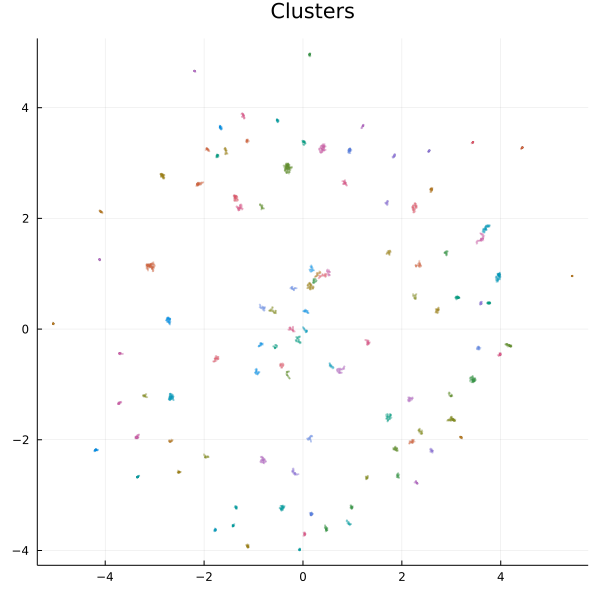

In [79]:
plot!(title="Clusters")


# Actividades
- Si usa Julia, revise el paquete `SimilaritySearch.jl`: <https://github.com/sadit/SimilaritySearch.jl> y <https://github.com/sadit/SimSearchManifoldLearning.jl>.
- Si usa Python, revise el paquete UMAP: <https://umap-learn.readthedocs.io/en/latest/>.
- Prepare la colección de `noticias` o el `emojispace` con la representación semántica basada en prototipos o la basada en nubes de puntos de las unidades anteriores, adicionalmente reproduzcalo para la representación basada en bolsa de palabras (primeras unidades del curso). Reproduzca las operaciones y el análisis de este notebook con estos datos.
- Reporte su notebook con una comparación de tiempos y calidadades.

# Bibliografía

- [@AW2019] Amid, E., & Warmuth, M. K. (2019). TriMap: Large-scale dimensionality reduction using triplets. arXiv preprint arXiv:1910.00204.
- [@LV2017] Lee, J. A., & Verleysen, M. (2007). Nonlinear dimensionality reduction (Vol. 1). New York: Springer.
- [@MHM2018] McInnes, L., Healy, J., & Melville, J. (2018). Umap: Uniform manifold approximation and projection for dimension reduction. arXiv preprint arXiv:1802.03426.
- [@SKL2011] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
- [@SPA2019] Soto, A. J., Przybyła, P., & Ananiadou, S. (2019). Thalia: semantic search engine for biomedical abstracts. Bioinformatics, 35(10), 1799-1801.
- [@SS2021] Sharma, K. K., & Seal, A. (2021). Spectral embedded generalized mean based k-nearest neighbors clustering with S-distance. Expert Systems with Applications, 169, 114326.
- [@VMH2018] Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11).
- [@YCC2020] Yu, Q., Chen, K. H., & Chen, J. J. (2020, September). Using a set of triangle inequalities to accelerate k-means clustering. In International Conference on Similarity Search and Applications (pp. 297-311). Springer, Cham.